In [1]:
import sys
sys.path.append('/gpfs/loomis/home.grace/ys668/software/koza4ok')
import uproot4 as uproot
import math
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve
from skTMVA import convert_bdt_sklearn_tmva

In [3]:
mltreeroot = uproot.open("/gpfs/loomis/home.grace/ys668/output/mltree1.root" )
mltree = mltreeroot["Stg"]

In [4]:
Crit2 = mltree.arrays( ["Crit2_RZRatio", "Crit2_RZRatio_trackIds", 
                        "Crit2_DeltaRho", "Crit2_DeltaRho_trackIds", 
                        "Crit2_DeltaPhi", "Crit2_DeltaPhi_trackIds", 
                        "Crit2_StraightTrackRatio", "Crit2_StraightTrackRatio_trackIds"] , library="pd")
Crit3 = mltree.arrays( ["Crit3_3DAngle", "Crit3_3DAngle_trackIds", 
                        "Crit3_ChangeRZRatio", "Crit3_ChangeRZRatio_trackIds", 
                        "Crit3_2DAngle", "Crit3_2DAngle_trackIds"] , library="pd")

In [5]:
print(type(Crit2), type(Crit3))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [6]:
Crit2

Crit2_RZRatio  Crit2_RZRatio_trackIds  Crit2_DeltaRho  \
entry subentry                                                          
0     0              1.021419                      -1       -4.738697   
      1              1.022302                      -1       -4.839012   
      2              1.304533                      -1      -17.746450   
      3              1.004187                     355        1.893636   
      4              1.594602                      -1      -26.755651   
...                       ...                     ...             ...   
49499 4              1.007454                      -1        2.785313   
      5              1.299637                      -1      -15.502758   
      6              1.299396                      -1      -15.427925   
      7              1.006945                      -1        2.691032   
      8              1.006917                      -1        2.640335   

                Crit2_DeltaRho_trackIds  Crit2_DeltaPhi  \
entry subentry                                            
0     0                              -1        0.801099   
      1                              -1        0.601002   
      2                              -1       19.210548   
      3                             355        3.855710   
      4                              -1       22.318817   
...                                 ...             ...   
49499 4                              -1        0.434769   
      5                              -1       12.340158   
      6                              -1       12.452241   
      7                              -1        0.081525   
      8                              -1        0.675205   

                Crit2_DeltaPhi_trackIds  Crit2_StraightTrackRatio  \
entry subentry                                                      
0     0                              -1                  0.691984   
      1                              -1                  0.688314   
      2                              -1                  0.409136   
      3                             355                  1.068689   
      4                              -1                  0.318865   
...                                 ...                       ...   
49499 4                              -1                  0.998189   
      5                              -1                  0.688496   
      6                              -1                  0.689373   
      7                              -1                  0.996621   
      8                              -1                  0.995380   

                Crit2_StraightTrackRatio_trackIds  
entry subentry                                     
0     0                                        -1  
      1                                        -1  
      2                                        -1  
      3                                       355  
      4                                        -1  
...                                           ...  
49499 4                                        -1  
      5                                        -1  
      6                                        -1  
      7                                        -1  
      8                                        -1  

[1322934 rows x 8 columns]

In [7]:
Crit3

Crit3_3DAngle  Crit3_3DAngle_trackIds  Crit3_ChangeRZRatio  \
entry subentry                                                               
0     0              1.279950                     355             1.001022   
      1              5.687575                      -1             1.000026   
      2              5.623889                      -1             0.999895   
      3              0.006734                     364             1.000004   
      4              0.294426                      -1             0.999873   
...                       ...                     ...                  ...   
49498 2              0.185218                      21             1.000437   
49499 0              0.035954                       9             0.999926   
      1              1.053257                      -1             0.999591   
      2              0.133228                      -1             1.000170   
      3              2.018154                      -1             1.000533   

                Crit3_ChangeRZRatio_trackIds  Crit3_2DAngle  \
entry subentry                                                
0     0                                  355      12.743137   
      1                                   -1      35.945984   
      2                                   -1      30.794954   
      3                                  364       0.100589   
      4                                   -1       5.050444   
...                                      ...            ...   
49498 2                                   21       0.643643   
49499 0                                    9       0.037294   
      1                                   -1       8.654246   
      2                                   -1       0.889553   
      3                                   -1      16.856396   

                Crit3_2DAngle_trackIds  
entry subentry                          
0     0                            355  
      1                             -1  
      2                             -1  
      3                            364  
      4                             -1  
...                                ...  
49498 2                             21  
49499 0                              9  
      1                             -1  
      2                             -1  
      3                             -1  

[1123483 rows x 6 columns]

In [8]:
hit2_obs = {}
hit2_obs['true'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio']][Crit2.Crit2_DeltaPhi_trackIds != -1]
hit2_obs['false'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio']][Crit2.Crit2_DeltaPhi_trackIds == -1]

In [9]:
hit3_obs = {}
hit3_obs['true'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle']][Crit3.Crit3_3DAngle_trackIds != -1]
hit3_obs['false'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle']][Crit3.Crit3_3DAngle_trackIds == -1]

In [10]:
print (type(hit3_obs), type(hit3_obs['true']))

<class 'dict'> <class 'pandas.core.frame.DataFrame'>


In [11]:
X2 = np.concatenate((hit2_obs['true'], hit2_obs['false']))
y2 = np.concatenate((np.ones(hit2_obs['true'].shape[0]),
                    np.zeros(hit2_obs['false'].shape[0])))
X3 = np.concatenate((hit3_obs['true'], hit3_obs['false']))
y3 = np.concatenate((np.ones(hit3_obs['true'].shape[0]),
                    np.zeros(hit3_obs['false'].shape[0])))

Train & test with crit2

In [12]:
# The Training and Testing Split, https://betatim.github.io/posts/sklearn-for-TMVA-users/
X2_dev,X2_eval, y2_dev,y2_eval = train_test_split(X2, y2,
                                              test_size=0.33, random_state=42)
X2_train,X2_test, y2_train,y2_test = train_test_split(X2_dev, y2_dev,
                                                  test_size=0.33, random_state=492)

In [13]:
# Training Decision Trees
dt = DecisionTreeClassifier(max_depth=3)
bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)

bdt.fit(X2_train, y2_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=800)

In [14]:
# Assessing a Classifier's Performance
y2_predicted = bdt.predict(X2_test)
print (classification_report(y2_test, y2_predicted,
                            target_names=["fake", "real"]))
print ("Area under ROC curve: %.4f"%(roc_auc_score(y2_test,
                                                  bdt.decision_function(X2_test))))

              precision    recall  f1-score   support

        fake       0.91      0.94      0.92    231134
        real       0.74      0.66      0.69     61367

    accuracy                           0.88    292501
   macro avg       0.82      0.80      0.81    292501
weighted avg       0.88      0.88      0.88    292501

Area under ROC curve: 0.9199


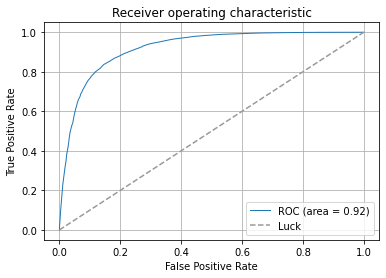

In [15]:
# Compute ROC curve and area under the curve
decisions = bdt.decision_function(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, decisions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

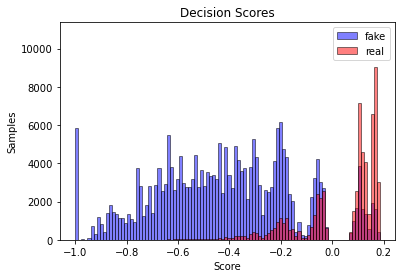

In [17]:
# Plot the two-class decision scores, https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
plot_colors = "br"
plot_step = 0.02
class_names = 'fake','real'

plot_range = (decisions.min(), decisions.max())
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(decisions[y2_test == i],
             bins=100,
             range=plot_range,
             facecolor=c,
             label=n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.show()

<ipython-input-20-22f38b10fec6>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(decisions[2],
<ipython-input-20-22f38b10fec6>:28: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(decisions[3],


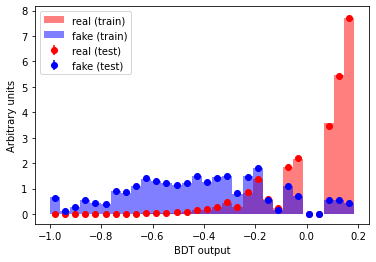

In [20]:
# Overtraining Check, https://betatim.github.io/posts/sklearn-for-TMVA-users/
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0], color='r', alpha=0.5, range=low_high, bins=bins,histtype='stepfilled', density=True,
             label='real (train)')
    plt.hist(decisions[1], color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', density=True,
             label='fake (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='real (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='fake (test)')

    plt.xlabel("BDT output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')
    
compare_train_test(bdt, X2_train, y2_train, X2_test, y2_test)

In [19]:
#skTMVA converter, https://github.com/yuraic/koza4ok
convert_bdt_sklearn_tmva(bdt, [('Crit2_RZRatio', 'F'), ('Crit2_DeltaRho', 'F'), ('Crit2_DeltaPhi', 'F'), ('Crit2_StraightTrackRatio', 'F')], 'crit2.xml')

Train and test with crit3

In [20]:
X3_dev,X3_eval, y3_dev,y3_eval = train_test_split(X3, y3,
                                              test_size=0.33, random_state=42)
X3_train,X3_test, y3_train,y3_test = train_test_split(X3_dev, y3_dev,
                                                  test_size=0.33, random_state=492)

In [21]:
dt = DecisionTreeClassifier(max_depth=3)
bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)

bdt.fit(X3_train, y3_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=800)

In [22]:
y3_predicted = bdt.predict(X3_test)
print (classification_report(y3_test, y3_predicted,
                            target_names=["fake", "real"]))
print ("Area under ROC curve: %.4f"%(roc_auc_score(y3_test,
                                                  bdt.decision_function(X3_test))))

              precision    recall  f1-score   support

        fake       0.97      0.97      0.97    215656
        real       0.82      0.80      0.81     32746

    accuracy                           0.95    248402
   macro avg       0.89      0.89      0.89    248402
weighted avg       0.95      0.95      0.95    248402

Area under ROC curve: 0.9680


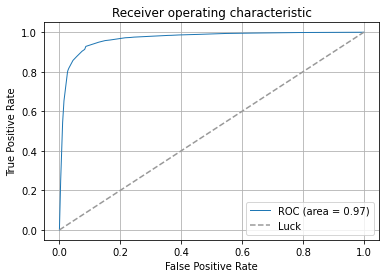

In [31]:
decisions = bdt.decision_function(X3_test)
fpr, tpr, thresholds = roc_curve(y3_test, decisions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

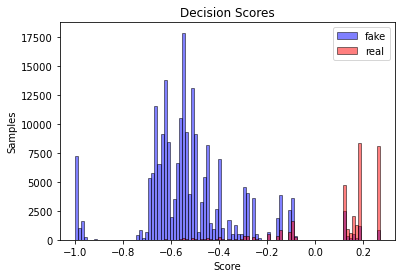

In [24]:
plot_colors = "br"

class_names = 'fake','real'

plot_range = (decisions.min(), decisions.max())
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(decisions[y3_test == i],
             bins=100,
             range=plot_range,
             facecolor=c,
             label=n,
             alpha=.5,
             edgecolor='k')

plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.show()

In [ ]:
convert_bdt_sklearn_tmva(bdt, [('Crit3_3DAngle', 'F'), ('Crit3_ChangeRZRatio', 'F'), ('Crit3_2DAngle', 'F')], 'crit3.xml')